In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kotesh Reddy\Desktop\free c\006 DL-and-ML-Practical-Tutorials-Package\DL and ML Practical Tutorials - Package\Project 1\Car_Purchasing_Data.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [5]:
df.drop(["Customer Name",'Customer e-mail'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              500 non-null    object 
 1   Gender               500 non-null    int64  
 2   Age                  500 non-null    float64
 3   Annual Salary        500 non-null    float64
 4   Credit Card Debt     500 non-null    float64
 5   Net Worth            500 non-null    float64
 6   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [7]:
df.isnull().sum()

Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [8]:
X = df.drop("Car Purchase Amount",axis=1)
y = df['Car Purchase Amount']

In [9]:
X.shape

(500, 6)

In [10]:
y.shape

(500,)

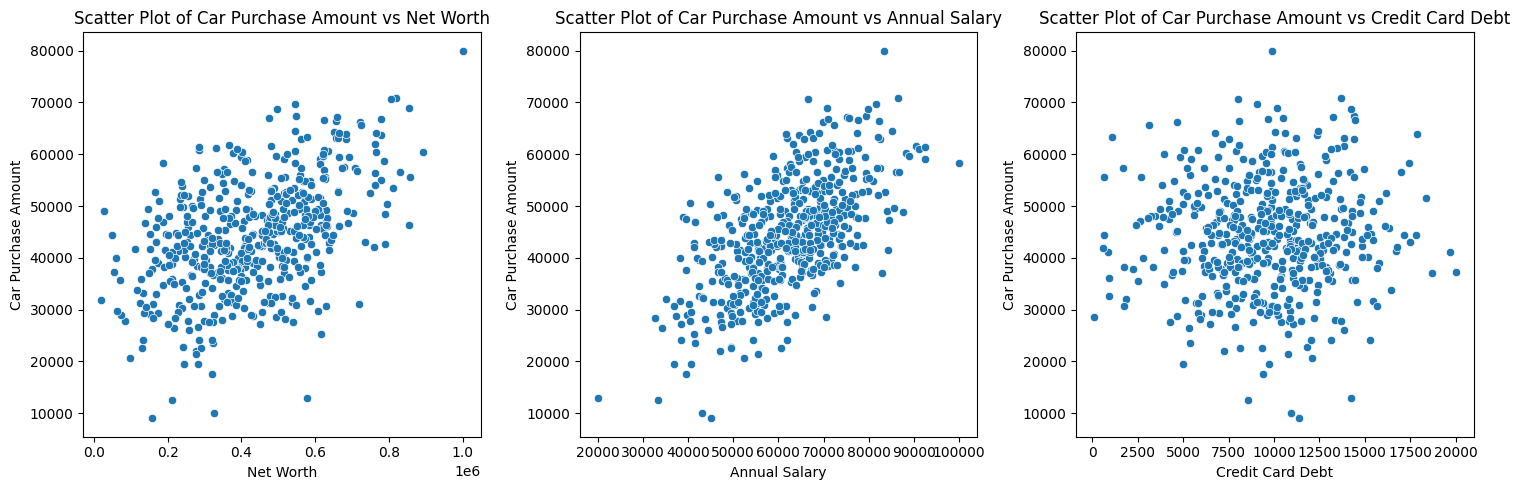

In [11]:

x_ax = ['Net Worth', 'Annual Salary', 'Credit Card Debt']
fig, axes = plt.subplots(1, len(x_ax), figsize=(15, 5), dpi=100)

for i, var in enumerate(x_ax):
    sns.scatterplot(x=var, y='Car Purchase Amount', data=df, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of Car Purchase Amount vs {var}')

plt.tight_layout()
plt.show()


<Axes: xlabel='Gender', ylabel='count'>

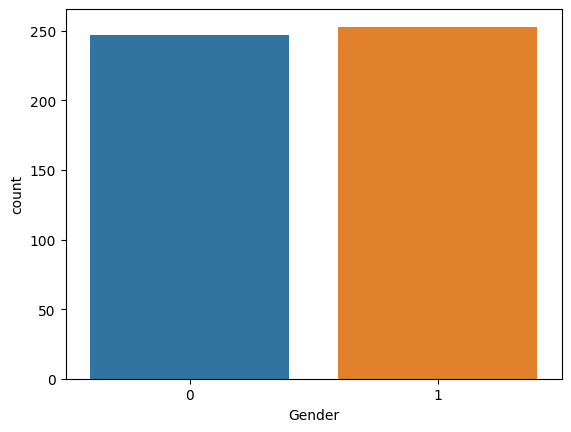

In [12]:
sns.countplot(x='Gender',data=df)#0-->Male,1-->Female

In [13]:
df.groupby('Gender')['Car Purchase Amount'].mean()

Gender
0    44933.131928
1    43503.620644
Name: Car Purchase Amount, dtype: float64

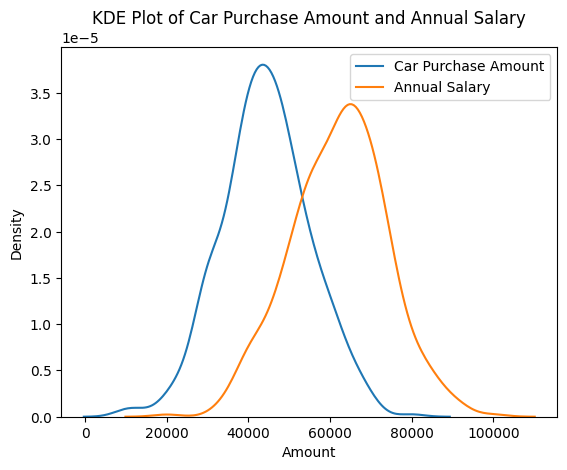

In [14]:
sns.kdeplot(df["Car Purchase Amount"], label="Car Purchase Amount")
sns.kdeplot(df["Annual Salary"], label="Annual Salary")

plt.xlabel("Amount")
plt.ylabel("Density")
plt.title("KDE Plot of Car Purchase Amount and Annual Salary")

plt.legend()

plt.show()


In [15]:
df['Country'].nunique()

211

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
scaled = MinMaxScaler()
X_scaled = scaled.fit_transform(X.drop("Country",axis=1))

In [18]:
X_scaled.shape

(500, 5)

In [19]:
X_scaled.min()

0.0

In [20]:
y = y.values.reshape(-1,1)

In [21]:
y_scaled = scaled.fit_transform(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

In [25]:
model.add(Dense(5,activation='relu',input_shape=(5,1)))

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='linear'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5, 5)                │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5, 20)               │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5, 20)               │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5, 1)                │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 571 (2.23 KB)

 Trainable params: 571 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [28]:
pred = model.fit(X_train,y_train,epochs=20,batch_size=25,verbose=1,validation_split=0.2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2287 - val_loss: 0.1498
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1422 - val_loss: 0.0790
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0786 - val_loss: 0.0349
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0433 - val_loss: 0.0232
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0283 - val_loss: 0.0252
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0290 - val_loss: 0.0238
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0273 - val_loss: 0.0221
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0267 - val_loss: 0.0213
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0253 - val_loss: 0.0212
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - val_loss: 0.0209
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0265 - val_loss: 0.0203
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0258 - val_

<Axes: >

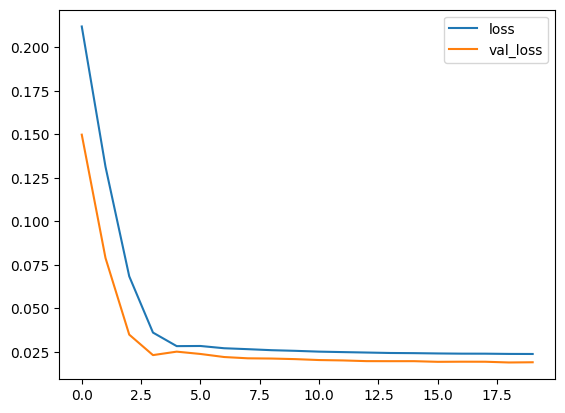

In [29]:
pd.DataFrame(model.history.history).plot()